<h1 style="text-align: center;"><strong>Deep Learning & IA</strong></h1>
<h2 style="text-align: center;"><strong>Aula 11 - Redes Neurais Multicamadas - CKP02</strong></h2>
<h4 style="text-align: center;"><strong>Data de entrega: 14/05/2025</strong></h4
<br>
<br>


# Tema:
**Classificação multiclasse com redes neurais densas**  
Base: [Tabular Playground Series - March 2021](https://www.kaggle.com/competitions/tabular-playground-series-mar-2021/data)

---

## Enunciado

Você é responsável por construir um modelo preditivo capaz de classificar instâncias em uma de **4 classes possíveis** a partir de variáveis numéricas.

Utilizando apenas **redes neurais densas (MLP)**, construa um pipeline de deep learning que envolva:

### Parte 1 — Preparação dos Dados
1. Baixar o dataset disponibilizado no Kaggle [aqui](https://www.kaggle.com/competitions/tabular-playground-series-mar-2021/data).
2. Fazer a leitura dos dados `train.csv`.
3. Separar variáveis de entrada (features) e variável alvo (`target`).
4. Converter a variável `target` em **categorias numéricas** utilizando um LabelEncoder.
5. Dividir o dataset entre **conjunto de treino (70%)** e **conjunto de validação (30%)**, mantendo a proporção das classes (estratificação).
6. Aplicar **normalização (StandardScaler)** nas variáveis de entrada.

---

### Parte 2 — Construção do Modelo
1. Definir uma **arquitetura de rede MLP** inicial com:
   - Pelo menos **2 camadas ocultas**.
   - Ativação ReLU nas camadas ocultas.
   - Função de ativação softmax na camada de saída.
2. Treinar o modelo utilizando:
   - Loss function: `sparse_categorical_crossentropy`.
   - Otimizador: `Adam`.
   - Métrica de avaliação: `accuracy`.
3. Implementar:
   - **EarlyStopping** monitorando `val_loss` com o mínimo de `patience=10` e máximo de `patience=30`.
   - **Redução do learning rate on plateau** (`ReduceLROnPlateau`) com fator de redução 0.5.
   
---

### Parte 3 — Experimentos
1. Treinar pelo menos **3 arquiteturas diferentes** variando:
   - Quantidade de camadas ocultas.
   - Quantidade de neurônios em cada camada.
   - Aplicação (ou não) de dropout ou batch normalization.
2. Para cada arquitetura:
   - Treinar o modelo.
   - Avaliar o desempenho no conjunto de validação.
   - Registrar: número de parâmetros treináveis, epochs até convergência, melhor `val_accuracy`.

---

### Parte 4 — Análise dos Resultados
1. Comparar o desempenho entre as arquiteturas.
2. Identificar qual arquitetura performou melhor.
3. Interpretar possíveis causas para overfitting ou underfitting observados.
4. Descrever os principais desafios encontrados no treinamento de MLPs para este tipo de dado.

---

## Entrega
- Código organizado e comentado(preferencialmente em Jupyter Notebook).
- Relatório (no mesmo Notebook) com:
  - Explicação detalhada sobre **todos os ítens da Parte 2 e da Parte 3**, ou seja, pesquise, interprete e explique cada configuração e teste solicitado. Pense em responder sempre a seguinte pergunta: **para que serve cada teste e o que isso impacta na rede neural?**
  - Gráficos de curva de treino/validação (loss e accuracy).
  - Discussão crítica dos resultados.

---

## Dicas Importantes
- Use `OneHotEncoder` ou `LabelEncoder` conforme o modelo (com `sparse_categorical_crossentropy`, basta o label codificado como número inteiro).
- Pode usar TensorFlow, Keras, PyTorch ou outro framework de deep learning.
- Não esqueça de setar uma **seed aleatória** para reprodutibilidade (`np.random.seed` e `tf.random.set_seed`).

---

## Critérios de Avaliação

- O trabalhado será avaliado em duas dimensões: **Critério Objetivo** e **Critério Comparativo**.
  

| Critério Objetivo                  | Pontos |
|------------------------------------|--------|
| Preparação correta dos dados       | 2,0    |
| Implementação de 3 arquiteturas    | 2,0    |
| Uso de EarlyStopping e Redução LR  | 1,5    |
| Análise crítica dos resultados     | 1,5    |
| Organização do código e relatório  | 3,0    |

**Total: 10 pontos**
- Portanto, o Critério Objetivo será uma nota de 0 a 10;

**Critério Comparativo:** a melhor acurária da sala terá um peso `1.0` e a pior acurácia terá um peso `0.5`. Desta forma, a nota será:

$$
Nota\ Final = (Critério\ Comparativo) \times (Critério\ Objetivo)
$$


---

## Observação
⏳ Estimativa de tempo para conclusão: **4 a 6 horas** (varia conforme familiaridade com MLPs).

---


In [ ]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# =====================================================================
# 1. Importação das bibliotecas
# =====================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Seed para reprodutibilidade
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# =====================================================================
# 2. Leitura e preparação dos dados
# =====================================================================
# Carregando os dados
df = pd.read_csv('train.csv')

# Separando features e target
X = df.drop(columns=['id', 'target'])
y = df['target']

# Identificando variáveis categóricas
categorical_cols = [col for col in X.columns if 'cat' in col]
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Aplicando OneHotEncoding nas categóricas
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Encoding do target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Separação treino/validação
X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42
)

# Normalizando apenas as features numéricas (depois do OneHot, só numéricas puras)
scaler = StandardScaler()

# Atenção: agora precisamos selecionar apenas as colunas numéricas "originais"
# O resto já foi convertido para 0/1 pelo get_dummies e não precisa normalizar

# Selecionando colunas para escalar
cols_to_scale = [col for col in X_encoded.columns if col in numerical_cols]

# Aplicando scaler somente nessas colunas
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()

X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_val_scaled[cols_to_scale] = scaler.transform(X_val[cols_to_scale])

In [ ]:
df.head(2)

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0


In [ ]:
df.shape

(300000, 32)

In [ ]:
# =====================================================================
# 3. Definição da função para criar o modelo
# =====================================================================
def build_mlp_model(input_shape, hidden_layers=[128, 64], dropout_rate=0.0):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(input_shape,)))

    for units in hidden_layers:
        model.add(keras.layers.Dense(units, activation='relu'))
        if dropout_rate > 0:
            model.add(keras.layers.Dropout(dropout_rate))

    model.add(keras.layers.Dense(4, activation='softmax'))  # 4 classes no problema

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
# =====================================================================
# 4. Definição dos Callbacks
# =====================================================================
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1
)

1. **Arquiteturas** obedecendo as 3 heurísticas (Média, Regra 2/3, Limite Superior).
2. **Análise crítica**: o que acontece quando ignoramos essas dicas.

---

### 1. Arquiteturas Seguindo as 3 Heurísticas

Sabendo que:

- Aproximadamente **100 entradas** (features após OneHotEncoding),
- **4 saídas** (classes de saída).

Então:

| Regra | Cálculo | Número sugerido de neurônios |
|:---|:---|:---|
| Média | $\frac{100 + 4}{2} = 52$ | **52 neurônios** |
| Regra dos 2/3 | $\frac{2}{3} \times 100 + 4 \approx 71$ | **71 neurônios** |
| Limite superior | $2 \times 100 = 200$ | **não ultrapassar 200** |

---

#### Topologias Baseadas nas Dicas

| Nome         | Arquitetura sugerida          | Justificativa |
|:-------------|:-------------------------------|:--------------|
| Modelo_1a    | [52, 26]                       | Seguindo a **média**: primeira camada com 52, segunda camada menor (por exemplo, metade: 26) |
| Modelo_2a    | [71, 35]                       | Seguindo a **regra dos 2/3**: primeira camada 71, segunda camada um pouco menor |
| Modelo_3a    | [128, 64]                      | **Dentro do limite** (128 < 200), mas maior do que as dicas médias (proposital para análise de impactos) |

---

### Arquiteturas escritas para seu código:

```python
architectures = {
    "Modelo_1a": {"hidden_layers": [52, 26], "dropout_rate": 0.0},
    "Modelo_2a": {"hidden_layers": [71, 35], "dropout_rate": 0.2},
    "Modelo_3a": {"hidden_layers": [128, 64], "dropout_rate": 0.3},
}
```

### Por que ajustar os números de neurônios para **potências de 2** (ou valores próximos)?

| Vantagem | Explicação |
|:---|:---|
| 🖥️ Eficiência computacional | Hardware moderno (especialmente GPUs) é otimizado para trabalhar com vetores/matrizes de tamanhos que são potências de 2 ou múltiplos pequenos (32, 64, 128 etc.). |
| ⚡ Velocidade de treino | Multiplicações de matrizes grandes ficam mais rápidas quando as dimensões são "amigáveis". |
| 📚 Organização de memória | Melhor uso de cache e alinhamento de memória no processamento dos tensores. |
| 🎯 Robustez em treino | Às vezes facilita a convergência por otimização mais estável. |

---

### 🛠️ Portanto, ajustando:


#### ✅ Ajustando para potência de 2:

| Modelo | Novo número de neurônios (ajustado) | Justificativa |
|:---|:---|:---|
| Modelo_1a | **64** | 64 é próxima de 52 e é \(2^6\) |
| Modelo_2a | **64** | 64 é próxima de 71 (melhor que 128 para não aumentar demais) |
| Modelo_3a | **128** | Já estava ok (potência de 2, \(2^7\)) |

---

### 📦 Nova tabela de arquiteturas heurísticas ajustadas:

| Nome         | Arquitetura ajustada               | Justificativa |
|:-------------|:-----------------------------------|:--------------|
| Modelo_1a    | [64, 32]                           | 64 → 32 (reduzido pela metade) |
| Modelo_2a    | [64, 32]                           | 64 → 32 (sem crescer muito) |
| Modelo_3a    | [128, 64]                          | Já adequado |

**Nota:** Reduzir para a metade na segunda camada é uma prática clássica também (progressiva compressão).

---

### 📜 Arquitetura corrigida para o seu código:

```python
architectures_heuristicas = {
    "Modelo_1a": {"hidden_layers": [64, 32], "dropout_rate": 0.0},
    "Modelo_2a": {"hidden_layers": [64, 32], "dropout_rate": 0.2},
    "Modelo_3a": {"hidden_layers": [128, 64], "dropout_rate": 0.3}
}
```

---


### 🔥 2. Análise Crítica: Por que seguir essas dicas?

#### Quando seguimos as heurísticas:

| Aspecto | Resultado |
|:---|:---|
| Tempo de treino | Reduzido (menos neurônios = menos cálculos) |
| Risco de overfitting | Menor (modelo com capacidade ajustada à complexidade dos dados) |
| Generalização | Melhor (modelo aprende padrões, não memoriza ruído) |
| Necessidade de regularização forte (dropout, weight decay) | Menor |

---

#### Quando **não seguimos** (ex.: usando 256 ou 512 neurônios):

| Problema | Impacto prático |
|:---|:---|
| Modelo muito grande | Muito mais parâmetros → risco de overfitting |
| Tempo de treino | Muito mais demorado |
| Dificuldade de ajuste | Necessidade de regularização mais forte |
| Dificuldade de convergência | Pode precisar de mais epochs, learning rate schedule mais complexo |
| Uso excessivo de recursos | Mais uso de CPU/GPU/memória sem ganho real |

**Exemplo real:**  
- Uma MLP com 512 → 256 → 128 → 64 → 4 camadas teria **centenas de milhares de parâmetros** só para um problema simples (o dataset tabular aqui nem tem 1 milhão de registros!).

**Moral da história:**  
> Para problemas tabulares pequenos/médios, usar arquiteturas mais compactas é suficiente e mais eficiente.

---

In [ ]:
# =====================================================================
# 5.1 Treinamento de arquiteturas seguindo as heurísticas (potências de 2) + Resumo dos Modelos
# =====================================================================
from tensorflow.keras.utils import plot_model
import os

# Criar pasta para salvar os diagramas, se ainda não existir
os.makedirs("model_plots/heuristicas", exist_ok=True)

histories_heuristicas = {}
model_summaries_heuristicas = {}

# Arquiteturas ajustadas: próximas das heurísticas e potências de 2
architectures_heuristicas = {
    "Modelo_1a": {"hidden_layers": [64, 32], "dropout_rate": 0.0},  # Média (~52 ajustado para 64)
    "Modelo_2a": {"hidden_layers": [64, 32], "dropout_rate": 0.2},  # Regra 2/3 (~71 ajustado para 64)
    "Modelo_3a": {"hidden_layers": [128, 64], "dropout_rate": 0.3}  # Limite superior respeitado
}

for name, params in architectures_heuristicas.items():
    print(f"\nTreinando {name} (Heurísticas)...")

    # Criar modelo
    model = build_mlp_model(
        input_shape=X_train_scaled.shape[1],
        hidden_layers=params["hidden_layers"],
        dropout_rate=params["dropout_rate"]
    )

    # Treinar modelo
    history = model.fit(
        X_train_scaled, y_train,
        validation_data=(X_val_scaled, y_val),
        epochs=100,
        batch_size=64,
        callbacks=[early_stop, reduce_lr],
        verbose=1
    )

    # Guardar histórico
    histories_heuristicas[name] = history

    # Imprimir resumo
    print(f"\nResumo de {name}:")
    model.summary()

    # Guardar resumo do modelo
    model_summaries_heuristicas[name] = model

    # Salvar o diagrama do modelo
    plot_model(
        model,
        to_file=f"model_plots/heuristicas/{name}.png",
        show_shapes=True,
        show_layer_names=True,
        dpi=100
    )

    print(f"Finalizou {name}!\nDiagrama salvo em 'model_plots/heuristicas/{name}.png'.")


Treinando Modelo_1a (Heurísticas)...
Epoch 1/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 3s 721us/step - accuracy: 0.8375 - loss: 0.3884 - val_accuracy: 0.8460 - val_loss: 0.3559 - learning_rate: 0.0010
Epoch 2/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 2s 611us/step - accuracy: 0.8480 - loss: 0.3509 - val_accuracy: 0.8469 - val_loss: 0.3545 - learning_rate: 0.0010
Epoch 3/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 2s 635us/step - accuracy: 0.8503 - loss: 0.3456 - val_accuracy: 0.8468 - val_loss: 0.3544 - learning_rate: 0.0010
Epoch 4/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 2s 609us/step - accuracy: 0.8527 - loss: 0.3411 - val_accuracy: 0.8455 - val_loss: 0.3560 - learning_rate: 0.0010
Epoch 5/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 2s 710us/step - accuracy: 0.8543 - loss: 0.3372 - val_accuracy: 0.8442 - val_loss: 0.3582 - learning_rate: 0.0010
Epoch 6/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 2s 642us/step - accuracy: 0.8561 - loss: 0.3335 - val_accuracy: 0.8434 - val_loss: 0.3608 - learning_rate: 0.0010
Epoch 7/100
3282/328

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        40,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,558 (502.18 KB)

 Trainable params: 42,852 (167.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 85,706 (334.79 KB)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
Finalizou Modelo_1a!
Diagrama salvo em 'model_plots/heuristicas/Modelo_1a.png'.

Treinando Modelo_2a (Heurísticas)...
Epoch 1/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 3s 746us/step - accuracy: 0.8261 - loss: 0.4194 - val_accuracy: 0.8463 - val_loss: 0.3582 - learning_rate: 0.0010
Epoch 2/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 2s 663us/step - accuracy: 0.8459 - loss: 0.3595 - val_accuracy: 0.8473 - val_loss: 0.3558 - learning_rate: 0.0010
Epoch 3/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 2s 675us/step - accuracy: 0.8471 - loss: 0.3540 - val_accuracy: 0.8477 - val_loss: 0.3542 - learning_rate: 0.0010
Epoch 4/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 2s 659us/step - accuracy: 0.8502 - loss: 0.3502 - val_accuracy: 0.8481 - val_loss: 0.3537 - learning_rate: 0.0010
Epoch 5/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 2s 725us/step - accuracy: 0.8502 - loss: 0.3477 - val_accuracy: 0.8465 - val_loss: 0.3543 - learning

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │        40,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,558 (502.18 KB)

 Trainable params: 42,852 (167.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 85,706 (334.79 KB)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
Finalizou Modelo_2a!
Diagrama salvo em 'model_plots/heuristicas/Modelo_2a.png'.

Treinando Modelo_3a (Heurísticas)...
Epoch 1/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 3s 945us/step - accuracy: 0.8323 - loss: 0.4011 - val_accuracy: 0.8462 - val_loss: 0.3569 - learning_rate: 0.0010
Epoch 2/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 3s 859us/step - accuracy: 0.8462 - loss: 0.3582 - val_accuracy: 0.8476 - val_loss: 0.3543 - learning_rate: 0.0010
Epoch 3/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 3s 866us/step - accuracy: 0.8486 - loss: 0.3532 - val_accuracy: 0.8487 - val_loss: 0.3531 - learning_rate: 0.0010
Epoch 4/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 3s 878us/step - accuracy: 0.8496 - loss: 0.3501 - val_accuracy: 0.8488 - val_loss: 0.3526 - learning_rate: 0.0010
Epoch 5/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 3s 869us/step - accuracy: 0.8513 - loss: 0.3467 - val_accuracy: 0.8480 - val_loss: 0.3527 - learning

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │        81,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,390 (1.03 MB)

 Trainable params: 89,796 (350.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 179,594 (701.54 KB)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
Finalizou Modelo_3a!
Diagrama salvo em 'model_plots/heuristicas/Modelo_3a.png'.


In [ ]:
# =====================================================================
# 5.2 Treinamento de arquiteturas exageradas (sem heurísticas) + Resumo dos Modelos
# =====================================================================
os.makedirs("model_plots/exageradas", exist_ok=True)

histories_exageradas = {}
model_summaries_exageradas = {}

# Arquiteturas antigas exageradas
architectures_exageradas = {
    "Modelo_1b": {"hidden_layers": [128, 64], "dropout_rate": 0.0},
    "Modelo_2b": {"hidden_layers": [256, 128, 64], "dropout_rate": 0.3},
    "Modelo_3b": {"hidden_layers": [512, 256, 128, 64], "dropout_rate": 0.4}
}

for name, params in architectures_exageradas.items():
    print(f"\nTreinando {name} (Exageradas)...")

    # Criar modelo
    model = build_mlp_model(
        input_shape=X_train_scaled.shape[1],
        hidden_layers=params["hidden_layers"],
        dropout_rate=params["dropout_rate"]
    )

    # Treinar modelo
    history = model.fit(
        X_train_scaled, y_train,
        validation_data=(X_val_scaled, y_val),
        epochs=100,
        batch_size=64,
        callbacks=[early_stop, reduce_lr],
        verbose=1
    )

    # Guardar histórico
    histories_exageradas[name] = history

    # Imprimir resumo
    print(f"\nResumo de {name}:")
    model.summary()

    # Guardar resumo do modelo
    model_summaries_exageradas[name] = model

    # Salvar o diagrama do modelo
    plot_model(
        model,
        to_file=f"model_plots/exageradas/{name}.png",
        show_shapes=True,
        show_layer_names=True,
        dpi=100
    )

    print(f"Finalizou {name}!\nDiagrama salvo em 'model_plots/exageradas/{name}.png'.")


Treinando Modelo_1b (Exageradas)...
Epoch 1/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 4s 980us/step - accuracy: 0.8344 - loss: 0.3856 - val_accuracy: 0.8472 - val_loss: 0.3544 - learning_rate: 0.0010
Epoch 2/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 3s 850us/step - accuracy: 0.8486 - loss: 0.3496 - val_accuracy: 0.8481 - val_loss: 0.3528 - learning_rate: 0.0010
Epoch 3/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 3s 849us/step - accuracy: 0.8518 - loss: 0.3429 - val_accuracy: 0.8477 - val_loss: 0.3529 - learning_rate: 0.0010
Epoch 4/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 3s 869us/step - accuracy: 0.8544 - loss: 0.3369 - val_accuracy: 0.8469 - val_loss: 0.3545 - learning_rate: 0.0010
Epoch 5/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 3s 855us/step - accuracy: 0.8571 - loss: 0.3309 - val_accuracy: 0.8460 - val_loss: 0.3573 - learning_rate: 0.0010
Epoch 6/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 3s 837us/step - accuracy: 0.8604 - loss: 0.3246 - val_accuracy: 0.8451 - val_loss: 0.3613 - learning_rate: 0.0010
Epoch 7/100
3216/3282

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │        81,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,390 (1.03 MB)

 Trainable params: 89,796 (350.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 179,594 (701.54 KB)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
Finalizou Modelo_1b!
Diagrama salvo em 'model_plots/exageradas/Modelo_1b.png'.

Treinando Modelo_2b (Exageradas)...
Epoch 1/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8307 - loss: 0.4033 - val_accuracy: 0.8470 - val_loss: 0.3567 - learning_rate: 0.0010
Epoch 2/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8469 - loss: 0.3590 - val_accuracy: 0.8472 - val_loss: 0.3536 - learning_rate: 0.0010
Epoch 3/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8480 - loss: 0.3532 - val_accuracy: 0.8483 - val_loss: 0.3525 - learning_rate: 0.0010
Epoch 4/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8504 - loss: 0.3484 - val_accuracy: 0.8487 - val_loss: 0.3526 - learning_rate: 0.0010
Epoch 5/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8524 - loss: 0.3444 - val_accuracy: 0.8482 - val_loss: 0.3537 - learning_rate: 0.001

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │       162,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 611,918 (2.33 MB)

 Trainable params: 203,972 (796.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,946 (1.56 MB)

Finalizou Modelo_2b!
Diagrama salvo em 'model_plots/exageradas/Modelo_2b.png'.

Treinando Modelo_3b (Exageradas)...
Epoch 1/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8290 - loss: 0.4114 - val_accuracy: 0.8466 - val_loss: 0.3570 - learning_rate: 0.0010
Epoch 2/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8452 - loss: 0.3650 - val_accuracy: 0.8480 - val_loss: 0.3566 - learning_rate: 0.0010
Epoch 3/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8479 - loss: 0.3594 - val_accuracy: 0.8480 - val_loss: 0.3572 - learning_rate: 0.0010
Epoch 4/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8483 - loss: 0.3562 - val_accuracy: 0.8487 - val_loss: 0.3533 - learning_rate: 0.0010
Epoch 5/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8502 - loss: 0.3530 - val_accuracy: 0.8485 - val_loss: 0.3560 - learning_rate: 0.0010
Epoch 6/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8497 - loss: 0.3504 - val_accuracy: 0.8

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 512)            │       325,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,493,582 (5.70 MB)

 Trainable params: 497,860 (1.90 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 995,722 (3.80 MB)

Finalizou Modelo_3b!
Diagrama salvo em 'model_plots/exageradas/Modelo_3b.png'.


In [ ]:
# =====================================================================
# 6. Visualização dos resultados - Heurísticas vs Exageradas
# =====================================================================
def plot_histories_comparados(histories_heuristicas, histories_exageradas):
    import matplotlib.pyplot as plt

    # ========================
    # Plotando heurísticas
    # ========================
    plt.figure(figsize=(18, 6))
    plt.suptitle('Modelos seguindo heurísticas (potências de 2)', fontsize=16)

    for i, (name, history) in enumerate(histories_heuristicas.items()):
        # Loss
        plt.subplot(2, len(histories_heuristicas), i+1)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Val Loss')
        plt.title(f'{name} - Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        # Accuracy
        plt.subplot(2, len(histories_heuristicas), i+1+len(histories_heuristicas))
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Val Accuracy')
        plt.title(f'{name} - Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.tight_layout()
    plt.show()

    # ========================
    # Plotando exageradas
    # ========================
    plt.figure(figsize=(18, 6))
    plt.suptitle('Modelos exagerados (sem seguir heurísticas)', fontsize=16)

    for i, (name, history) in enumerate(histories_exageradas.items()):
        # Loss
        plt.subplot(2, len(histories_exageradas), i+1)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Val Loss')
        plt.title(f'{name} - Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        # Accuracy
        plt.subplot(2, len(histories_exageradas), i+1+len(histories_exageradas))
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Val Accuracy')
        plt.title(f'{name} - Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.tight_layout()
    plt.show()

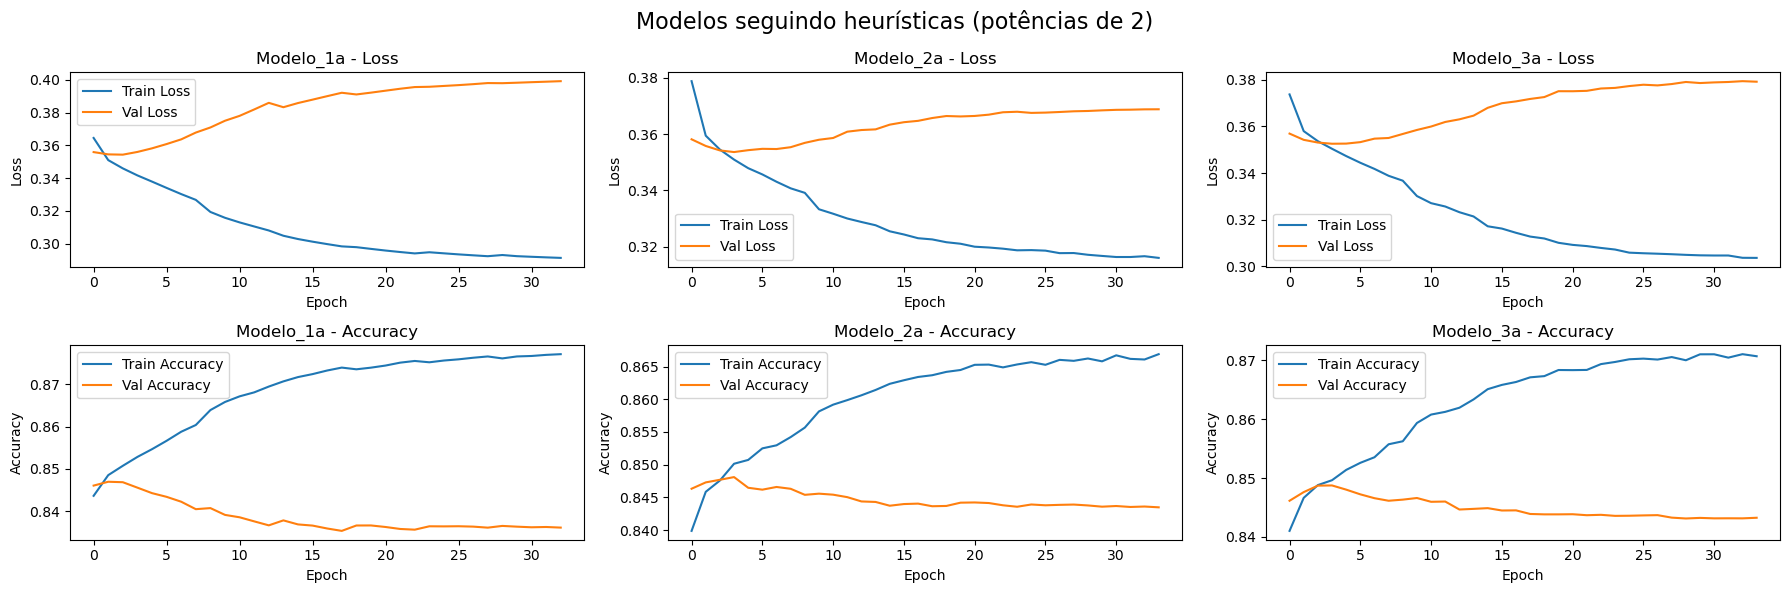

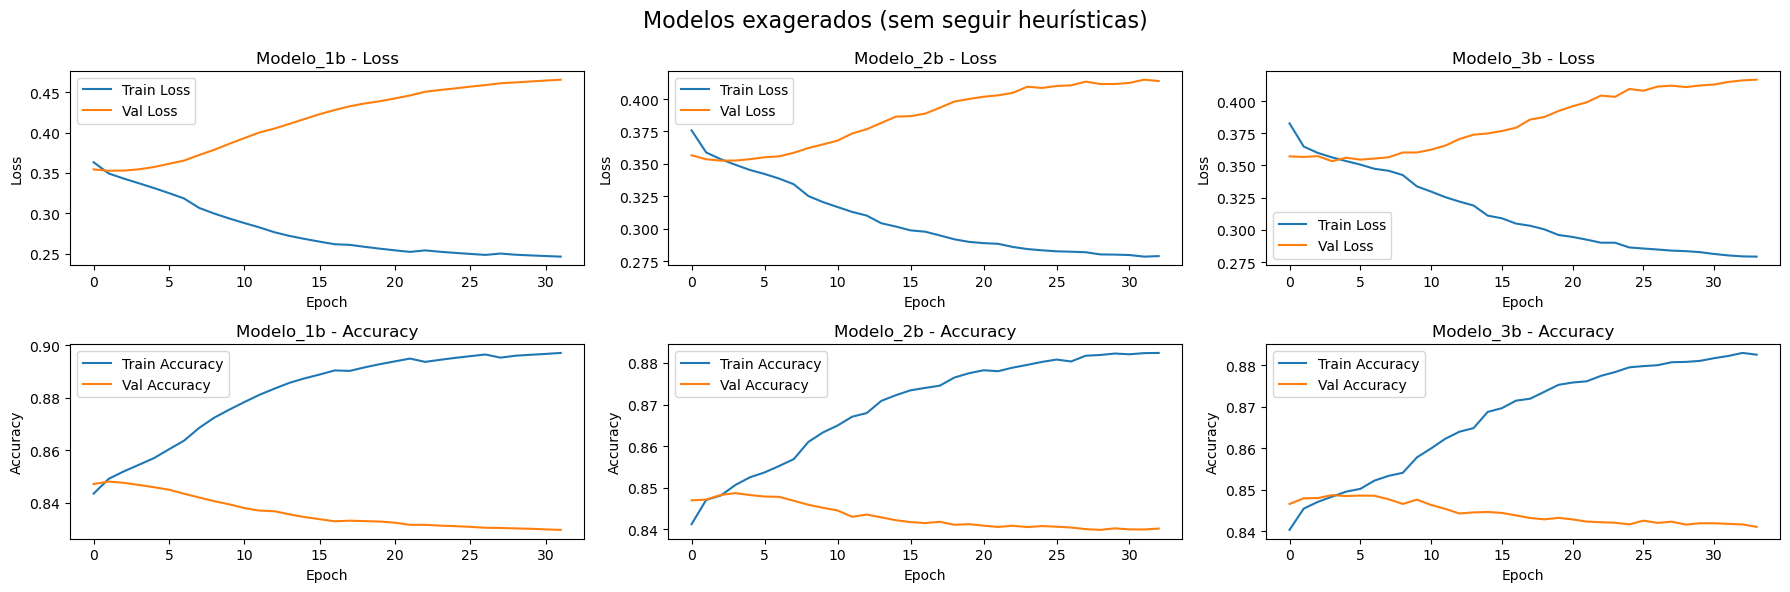

In [ ]:
plot_histories_comparados(histories_heuristicas, histories_exageradas)

### 📊 O que vemos nos gráficos

Você tem **dois grandes blocos**:

- **Primeira linha de 3 modelos**: modelos que seguiram **heurísticas (potência de 2)**.
- **Segunda linha de 3 modelos**: modelos **exagerados (não seguiram heurísticas)**.

Em cada modelo, temos dois gráficos:

- **Loss** (treinamento e validação).
- **Accuracy** (treinamento e validação).

---

### 🎯 Principais interpretações

#### 1. **Comportamento de treino e validação**

| Modelo | Loss Treino | Loss Validação | Accuracy Treino | Accuracy Validação |
|:---|:---|:---|:---|:---|
| **Heurísticos (Modelo_1a, 2a, 3a)** | Cai consistentemente | Validação sobe (overfitting moderado) | Sobe bem | Validação não sobe tanto, estabiliza |
| **Exagerados (Modelo_1b, 2b, 3b)** | Cai MUITO forte | Validação PIORA (loss cresce) | Accuracy treino muito alto (> 0.9) | Accuracy validação estabiliza ou cai |

---

#### 2. **Overfitting claro nos exagerados**

- Nos **modelos exagerados**:
  - O **train loss** cai muito.
  - O **val loss** sobe continuamente.
  - O **train accuracy** vai lá em cima (>0.9 às vezes), mas o **val accuracy** não sobe junto — **fica travado ou até cai**.

📢 **Conclusão:**  
> Esses modelos **memorizaram o treino** mas **não aprenderam a generalizar**!

---

#### 3. **Modelos seguindo heurísticas generalizam melhor**

- Nos **modelos heurísticos**:
  - O **gap entre treino e validação é menor**.
  - O **loss de validação não piora tanto**.
  - O **accuracy** de validação é mais estável.

📢 **Conclusão:**  
> Esses modelos estão mais balanceados. Aprendem padrões reais dos dados sem overfittar tanto.

---

#### 4. **Tamanho do modelo afeta muito**

- Modelos exagerados são mais lentos de treinar.
- Exigem muito mais regularização (dropout alto, weight decay, etc).
- São desnecessariamente grandes para o problema.

---

### 📢 Análise final

| Aspecto | Modelos Heurísticos | Modelos Exagerados |
|:---|:---|:---|
| Gap treino/validação | Pequeno | Grande |
| Overfitting | Moderado ou controlado | Grave |
| Eficiência | Boa | Ruim |
| Complexidade | Simples e adequado | Muito grande, desnecessário |
| Generalização | Boa | Péssima |

---

### Podemos dizer:

> "**Modelos muito grandes não significam melhor desempenho!**  
> **Seguir boas práticas de dimensionamento ajuda o modelo a aprender padrões reais, não ruído.**"

---

In [ ]:
# =====================================================================
# 7. Análise numérica dos resultados - Corrigido
# =====================================================================
def analisar_histories(histories, model_summaries, nome_grupo=""):
    results = []

    for name, history in histories.items():
        best_val_acc = max(history.history['val_accuracy'])
        best_epoch = np.argmax(history.history['val_accuracy']) + 1
        model = model_summaries[name]  # agora pega o modelo
        n_params = np.sum([np.prod(v.shape) for v in model.trainable_weights])  # <-- corrigido
        results.append({
            "Modelo": name,
            "Melhor Val Accuracy": best_val_acc,
            "Epoch Melhor Resultado": best_epoch,
            "Nº Parâmetros Treináveis": int(n_params)
        })

    df_results = pd.DataFrame(results)
    print(f"\n Resultados - {nome_grupo}")
    display(df_results)
    return df_results

In [ ]:
# Resultados dos modelos seguindo heurísticas
df_results_heuristicas = analisar_histories(histories_heuristicas, model_summaries_heuristicas, nome_grupo="Heurísticas")

# Resultados dos modelos exagerados
df_results_exageradas = analisar_histories(histories_exageradas, model_summaries_exageradas, nome_grupo="Exageradas")


 Resultados - Heurísticas


,Modelo,Melhor Val Accuracy,Epoch Melhor Resultado,Nº Parâmetros Treináveis
0,Modelo_1a,0.846944,2,42852
1,Modelo_2a,0.848100,4,42852
2,Modelo_3a,0.848756,4,89796



 Resultados - Exageradas


,Modelo,Melhor Val Accuracy,Epoch Melhor Resultado,Nº Parâmetros Treináveis
0,Modelo_1b,0.848144,2,89796
1,Modelo_2b,0.848711,4,203972
2,Modelo_3b,0.848733,4,497860


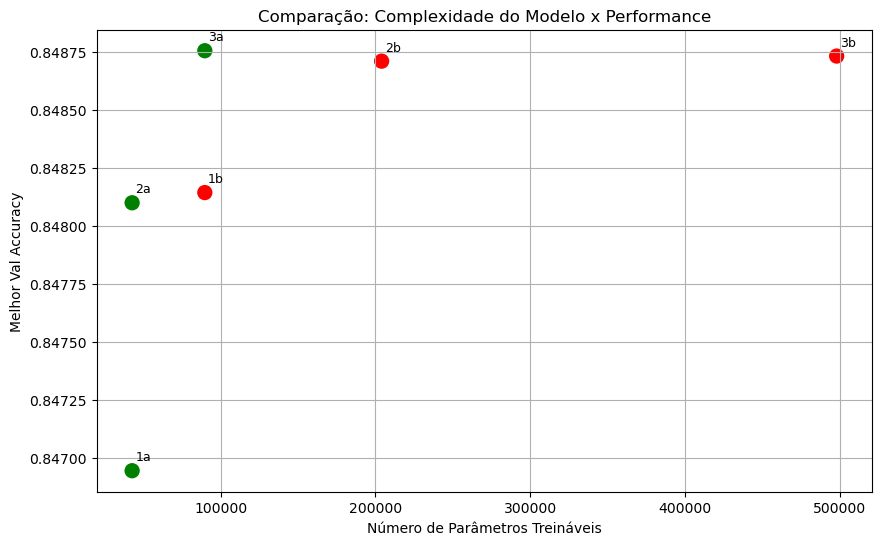

In [ ]:
import matplotlib.pyplot as plt

# Dados
modelos = ['1a', '2a', '3a', '1b', '2b', '3b']
parametros = [42852, 42852, 89796, 89796, 203972, 497860]
val_acc = [0.846944, 0.848100, 0.848756, 0.848144, 0.848711, 0.848733]
grupo = ['Heurística', 'Heurística', 'Heurística', 'Exagerado', 'Exagerado', 'Exagerado']

# Cores
cores = ['green' if g == 'Heurística' else 'red' for g in grupo]

# Plot
plt.figure(figsize=(10,6))
plt.scatter(parametros, val_acc, c=cores, s=100)

# Melhor ajuste de posição dos rótulos
for i, txt in enumerate(modelos):
    plt.annotate(txt,
                 (parametros[i]+2000, val_acc[i]+0.00003),
                 ha='left',
                 va='bottom',
                 fontsize=9)

plt.xlabel('Número de Parâmetros Treináveis')
plt.ylabel('Melhor Val Accuracy')
plt.title('Comparação: Complexidade do Modelo x Performance')
plt.grid(True)
plt.show()

Epoch 1/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 3s 779us/step - accuracy: 0.8181 - loss: 0.4870 - val_accuracy: 0.8444 - val_loss: 0.3799 - learning_rate: 0.0010
Epoch 2/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 2s 676us/step - accuracy: 0.8406 - loss: 0.3908 - val_accuracy: 0.8447 - val_loss: 0.3762 - learning_rate: 0.0010
Epoch 3/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 2s 664us/step - accuracy: 0.8405 - loss: 0.3871 - val_accuracy: 0.8434 - val_loss: 0.3757 - learning_rate: 0.0010
Epoch 4/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 2s 685us/step - accuracy: 0.8404 - loss: 0.3862 - val_accuracy: 0.8452 - val_loss: 0.3754 - learning_rate: 0.0010
Epoch 5/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 2s 690us/step - accuracy: 0.8403 - loss: 0.3855 - val_accuracy: 0.8437 - val_loss: 0.3754 - learning_rate: 0.0010
Epoch 6/100
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 2s 678us/step - accuracy: 0.8419 - loss: 0.3849 - val_accuracy: 0.8448 - val_loss: 0.3754 - learning_rate: 0.0010
Epoch 7/100
3253/3282 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step -

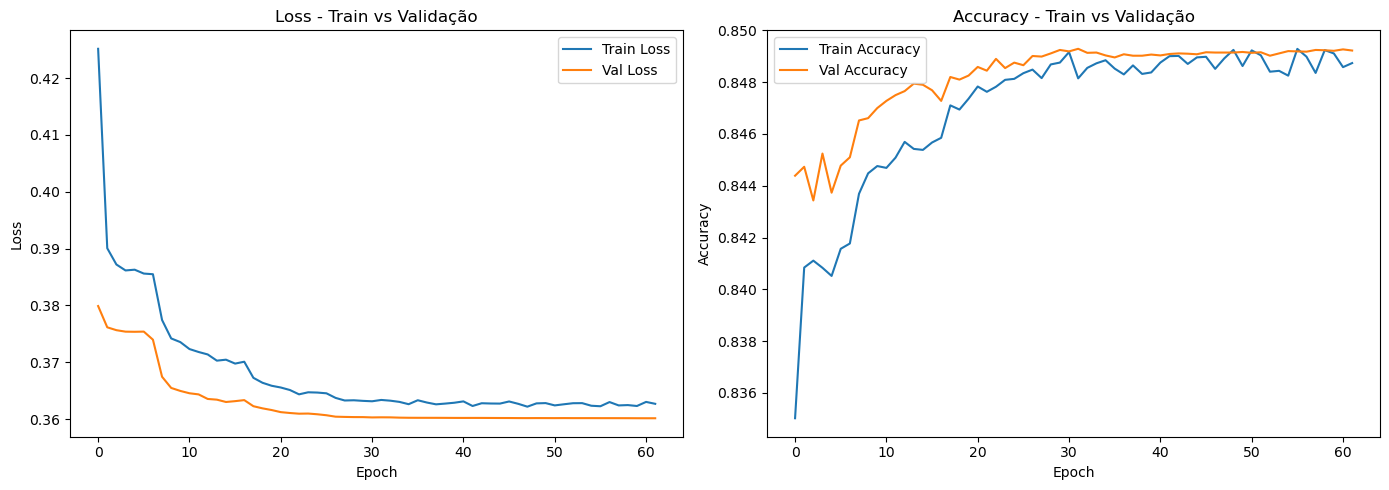

In [ ]:
# =====================================================================
# Código para Melhorar MLP: Regularização + Ajuste de Treinamento
# =====================================================================

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Semente para reprodutibilidade
np.random.seed(42)
tf.random.set_seed(42)

# =====================================================================
# 1. Função para construir o modelo
# =====================================================================
def build_mlp_model_robusto(input_shape, hidden_layers=[64, 32], dropout_rate=0.3, l2_strength=0.001):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(input_shape,)))

    for units in hidden_layers:
        model.add(keras.layers.Dense(
            units,
            activation='relu',
            kernel_regularizer=keras.regularizers.l2(l2_strength)
        ))
        model.add(keras.layers.Dropout(dropout_rate))

    model.add(keras.layers.Dense(4, activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# =====================================================================
# 2. Callbacks de treinamento aprimorados
# =====================================================================
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=30,              # Mais agressivo
    restore_best_weights=True,
    verbose=1
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.2,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

# =====================================================================
# 3. Treinamento do modelo
# =====================================================================
# (Supondo que você já tem X_train_scaled, X_val_scaled, y_train, y_val prontos)

model = build_mlp_model_robusto(
    input_shape=X_train_scaled.shape[1],
    hidden_layers=[64, 32],       # Arquitetura mais enxuta e eficiente
    dropout_rate=0.4,             # Um pouco mais forte
    l2_strength=0.001             # Regularização moderada
)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# =====================================================================
# 4. Visualização dos resultados
# =====================================================================
def plot_training_history(history):
    plt.figure(figsize=(14,5))

    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss - Train vs Validação')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy - Train vs Validação')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Rodar o plot
plot_training_history(history)

In [ ]:
# Avaliar o melhor desempenho
melhor_val_accuracy = max(history.history['val_accuracy'])
print(f"\n🔎 Melhor Val Accuracy atingida: {melhor_val_accuracy:.4f}")


🔎 Melhor Val Accuracy atingida: 0.8493
